In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import preprocessing as pre

In [2]:
path = "C:/Users/Aina/OneDrive/Escritorio/Analisis Imatge y video/Assignment1/MUSI-11761-Crowd-Counting/shihab/raw_images"
files = os.listdir(path)
results ={}
for i,file in enumerate(files[:10]):
    img = cv2.imread(os.path.join(path,file), cv2.IMREAD_GRAYSCALE)  # Read the image.
    img = img.astype('float32')  # Convert to float32 to avoid overflow and rounding errors
    results[f'{file}']= {
        'img': img,
        'histogram_equalization': pre.histogram_equalization(img),
        'clahe': pre.clahe(img.astype('uint8'))
    }

IMAGE SUBSTRACTION + SOBEL 

1. IMAGE SUBSTRACTION

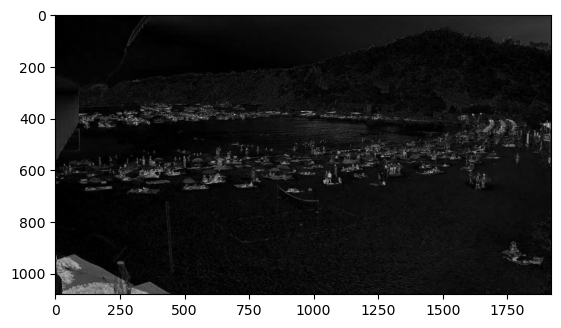

In [3]:
background_gray = results['1660366800.jpg']['img']
img_gray = results['1660392000.jpg']['img']

# Ensure images have same dimensions
if img_gray.shape != background_gray.shape:
    raise ValueError("Image and background must have the same dimensions")

# Subtract background
diff = cv2.absdiff(img_gray, background_gray)
plt.imshow(diff, cmap='gray')

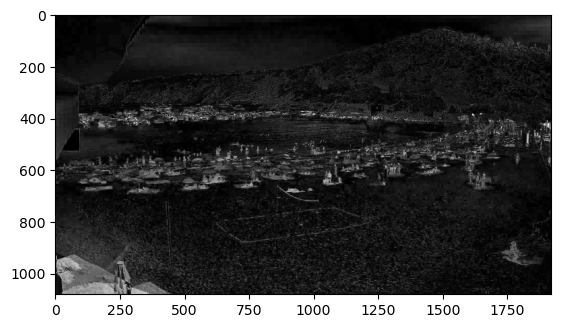

In [4]:
background_gray = results['1660366800.jpg']['clahe']
img_gray = results['1660392000.jpg']['clahe']

# Ensure images have same dimensions
if img_gray.shape != background_gray.shape:
    raise ValueError("Image and background must have the same dimensions")

# Subtract background
diff = cv2.absdiff(img_gray, background_gray)
plt.imshow(diff, cmap='gray')

2. GAUSSIAN FILTERS AND SOBEL

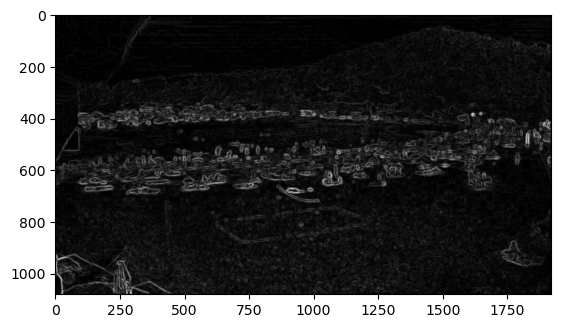

In [5]:
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(diff, (15, 15), 0)
blurred = pre.apply_sobel(blurred)
plt.imshow(blurred, cmap='gray')

Apply threshold and other filters to remove noise

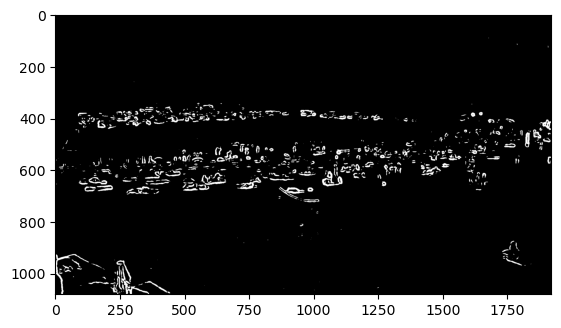

In [6]:
# Apply threshold to create binary image
_, thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)

# Apply morphological operations to remove noise and connect components
kernel = np.ones((1, 1), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plt.imshow(thresh, cmap='gray')

FIND CONTOURS AND COUNT THEM

In [7]:
non_overlapping_contours = pre.filterContours(thresh, 20, 60)
result_img = img_gray
for x, y, w, h in non_overlapping_contours:
    cv2.rectangle(result_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

estimated_count = len(non_overlapping_contours)     

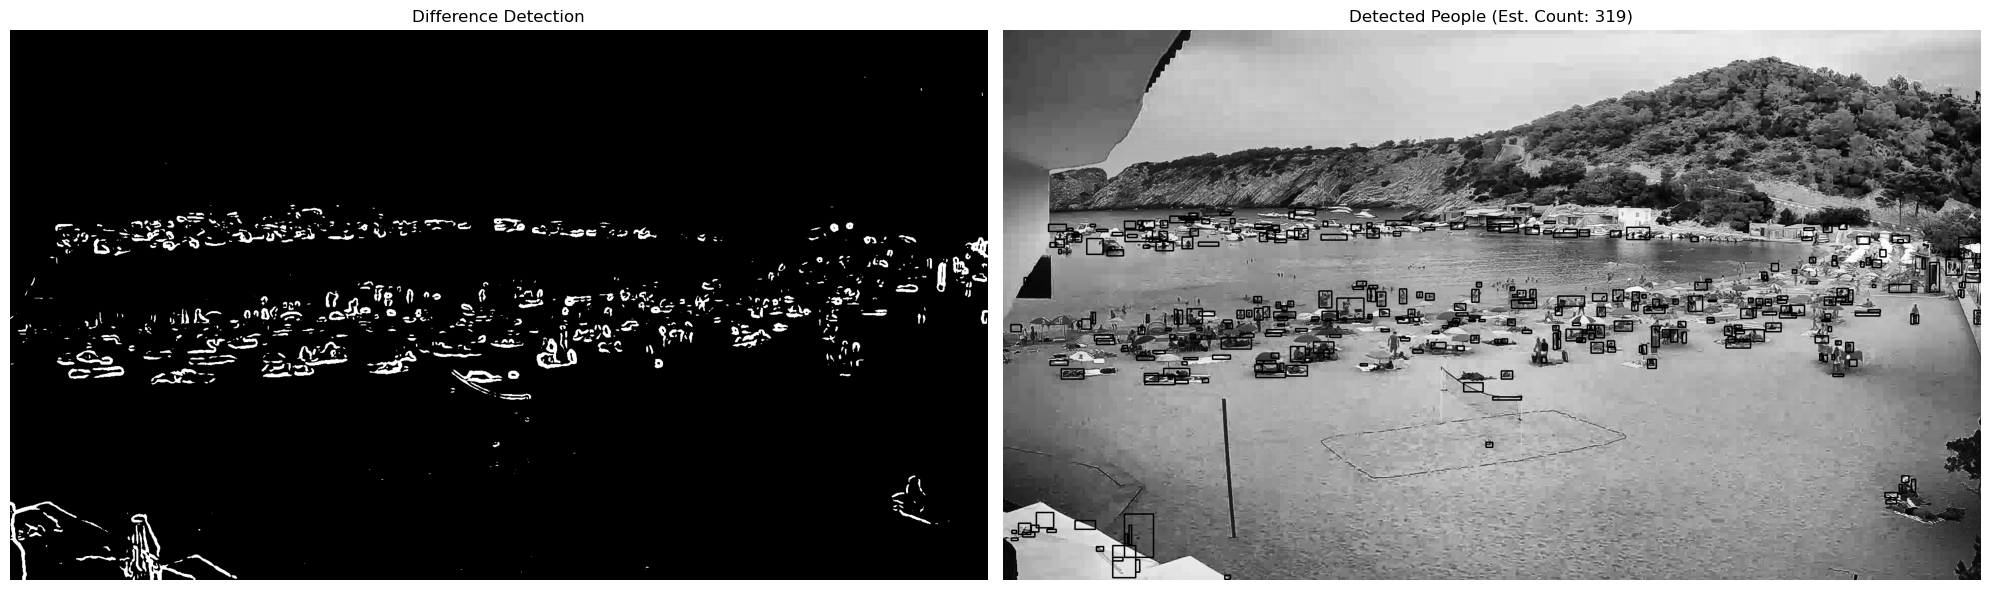

Estimated number of people in : 319


In [8]:
# Display results
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.title('Difference Detection')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.title(f'Detected People (Est. Count: {estimated_count})')
plt.imshow(result_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Estimated number of people in : {estimated_count}")

IMAGE AVERAGING AND PIXEL-WISE COMPARISON + SOBEL 

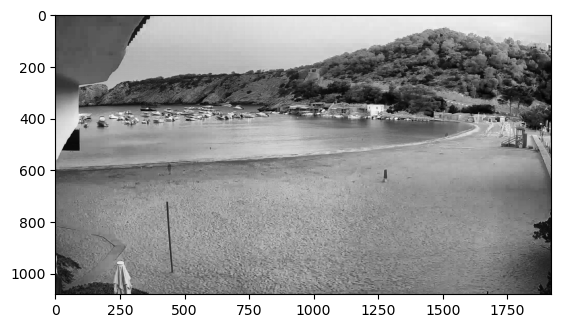

In [11]:
images=["1660366800.jpg","1660370400.jpg"]
background_gray = pre.image_averaging(images, 'clahe',results)
plt.imshow(background_gray, cmap='gray')
plt.show()

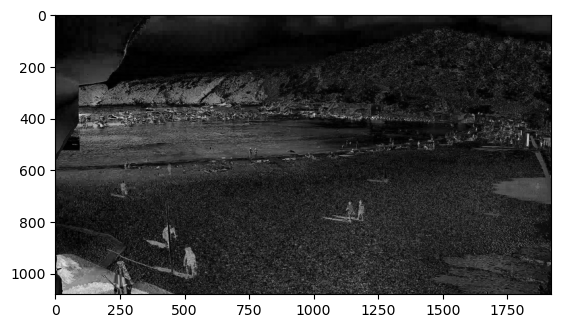

In [14]:
img_gray = results['1660377600.jpg']['clahe']

# Ensure images have same dimensions
if img_gray.shape != background_gray.shape:
    raise ValueError("Image and background must have the same dimensions")

# Subtract background
diff = cv2.absdiff(img_gray, background_gray)
plt.imshow(diff, cmap='gray')

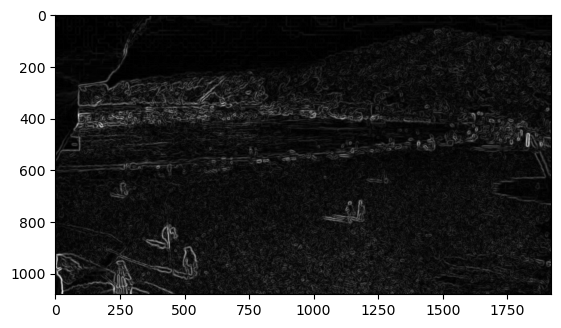

In [15]:
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(diff, (15, 15), 0)
blurred = pre.apply_sobel(blurred)
plt.imshow(blurred, cmap='gray')

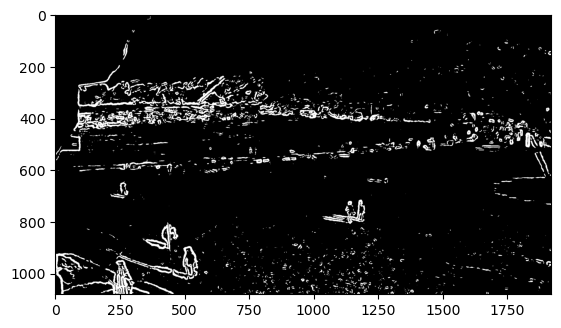

In [ ]:
# Apply threshold to create binary image
_, thresh = cv2.threshold(blurred, 45, 255, cv2.THRESH_BINARY)

# Apply morphological operations to remove noise and connect components
kernel = np.ones((1, 1), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plt.imshow(thresh, cmap='gray')

In [20]:
non_overlapping_contours = pre.filterContours(thresh, 20, 60)
result_img = img_gray
for x, y, w, h in non_overlapping_contours:
    cv2.rectangle(result_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

estimated_count = len(non_overlapping_contours)    

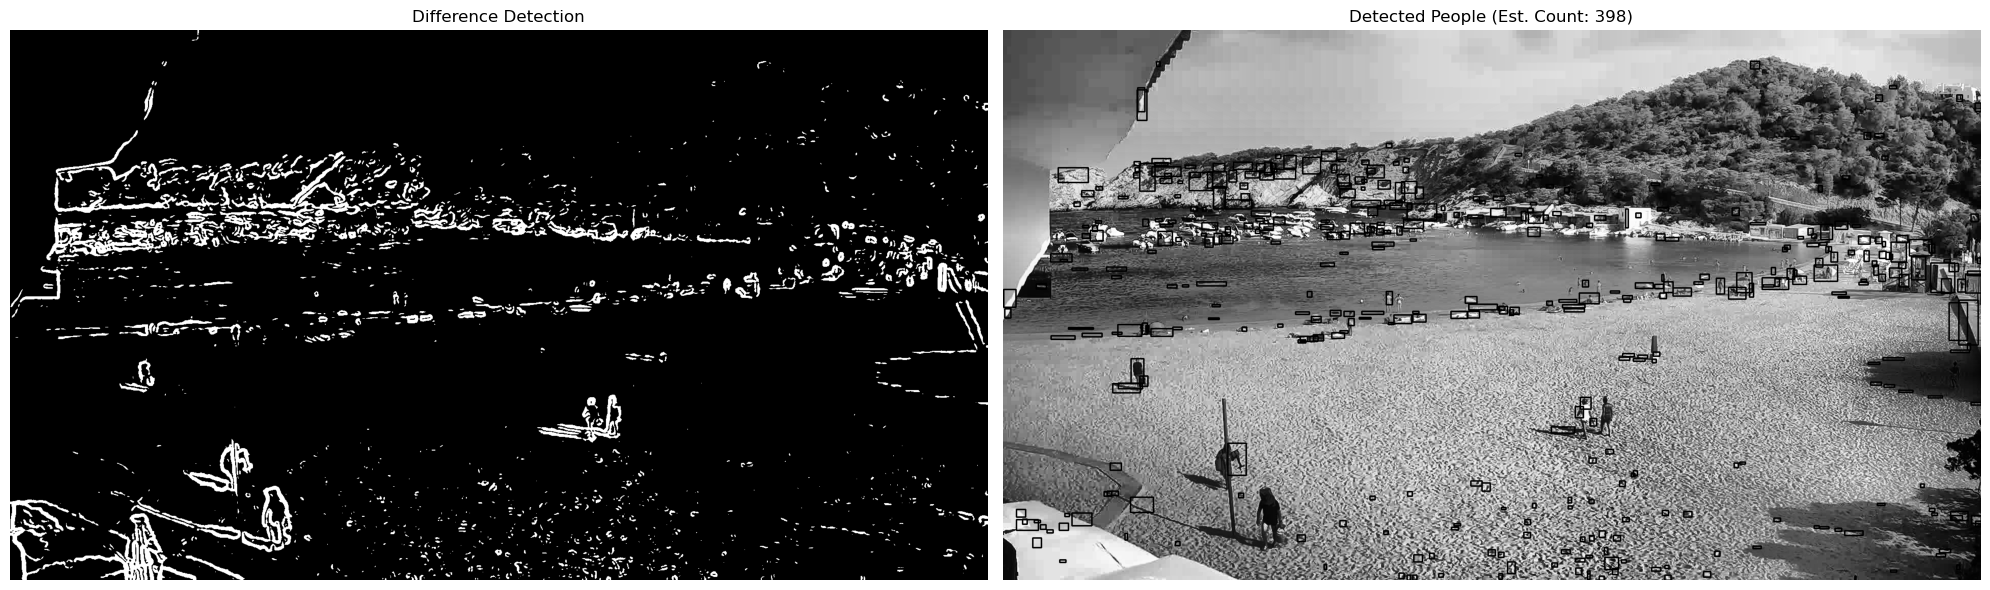

Estimated number of people in : 398


In [21]:
# Display results
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.title('Difference Detection')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.title(f'Detected People (Est. Count: {estimated_count})')
plt.imshow(result_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Estimated number of people in : {estimated_count}")

METRICS 

In [ ]:
totalnumber = ...
detected = ...
mse = np.mean((np.array(totalnumber) - np.array(detected))**2)

print(f"Mean Squared Error (MSE): {mse}")